# MCMC Applications: Denoising Images


**References and credits**

* Following based on: https://github.com/suyunu/Markov-Chain-Monte-Carlo
* Another good reference: https://tanyaschlusser.github.io/posts/mcmc-and-the-ising-model/ 
* The Markov-chain Monte Carlo Interactive Gallery
 https://chi-feng.github.io/mcmc-demo/ 

## Image to Text

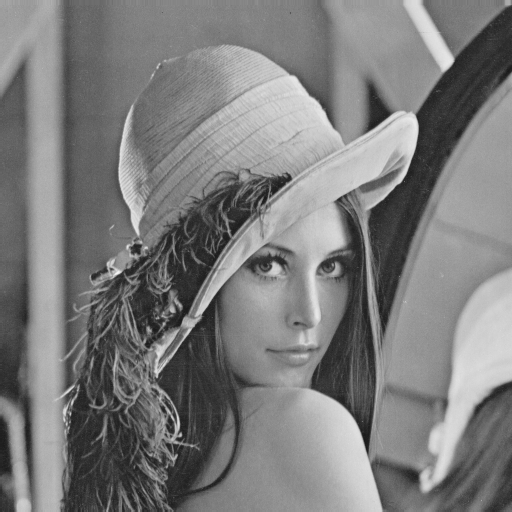

In [2]:
import numpy as np

url = "https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_gray.gif"

from urllib.request import urlopen
from PIL import Image

imgX = Image.open(urlopen(url))
imgX = imgX.convert('L')

def image_to_text(img, outputfile="whatever.txt"):

  img = np.asarray(img)
  img = 2*(img > 128).astype(int)-1

  #file = open(sys.argv[2], "w")
  file = open(outputfile, "w")

  txt = list(img)
  for i in txt:
      for j in i:
          file.write(str(j) + " ")
      file.write('\n')
  file.close()

  return img 

outputfile = "outO.txt" 
img_new = image_to_text(imgX,outputfile)

imgX

## Make noise

In [53]:
import sys
import numpy as np


def make_noise(txtfile, outputfile):

  #img = np.loadtxt(sys.argv[1])
  #img = np.loadtxt("outO.txt")
  img = np.loadtxt(txtfile)

  #pi = float(sys.argv[2])
  pi = float(0.15)

  I,J = img.shape
  flip = np.random.rand(I,J) < pi
  X = img * (-1)**flip

  #file = open(sys.argv[3], "w")
  file = open(outputfile, "w")

  txt = list(X)
  for i in txt:
      for j in i:
          file.write(str(int(j)) + " ")
      file.write('\n')
  file.close()

  return X,I,J

txtfile = "outO.txt"
outputfile = "outN.txt"
X,I,J = make_noise(txtfile,outputfile)

## Text to image

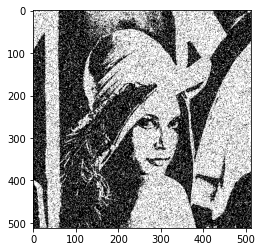

In [32]:
import sys
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
import imageio

def text_to_image(filepath,outimage):

  img = np.loadtxt(filepath)

  #imageio.imwrite(sys.argv[2], img)
  imageio.imwrite(outimage, img)

  plt.imshow(img,cmap='gray',vmin=-1,vmax=1)
  plt.show()

  I,J = img.shape
  return I,J

filepath = "outN.txt"
outimage = "outI.png"
In,Jn = text_to_image(filepath,outimage) 

## Image Denoising

We will sample a $Z$ from the posterior distribution. Hopefully, it will appear as denoised.

In [33]:
beta, pi  = 0.8, 0.15 # for arbitrary parameters that reflects our prior belief
gamma = 0.5*np.log((1-pi)/pi)

T = 500000 # sufficient number of steps to converge stationary distribution

In [34]:
Z = X.copy() # Initialize Z from X 
for t in range(T):
    if(t%10000==0):
      #print("...{:}".format(t))
      print('\r', 'Iteration', t, end='')
    i,j = np.random.choice(I), np.random.choice(J) # randomly choose a coordinate (i,j)
    
    # Calculate acceptance propability
    # We don't take exponential. Instead, we take the log of random number. This is more stable.
    delta_E = -2*gamma*X[i,j]*Z[i,j] -2*beta*Z[i,j]*(np.sum(Z[max(i-1,0):i+2,max(j-1,0):j+2]) - Z[i,j])
    
    # We also don't deal with minimum function for acceptance probability
    #   because we don't need to cast it to 1 if it is higher.
    
    # Flip the pixel if accepted
    if np.log(np.random.rand()) < delta_E:
        Z[i,j] = - Z[i,j] # Update the image

 Iteration 490000

## Result

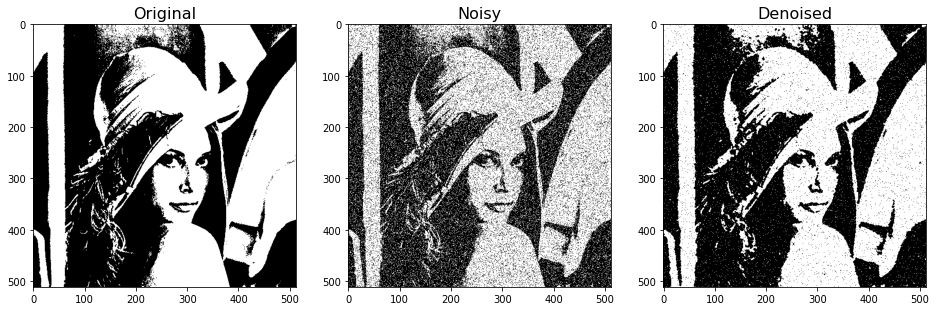

In [37]:
fig, ax = plt.subplots(1,3, figsize=(16,8))
ax[0].imshow(img_new,cmap='gray',vmin=-1,vmax=1)
ax[0].set_title("Original", fontsize=16)
ax[1].imshow(X,cmap='gray',vmin=-1,vmax=1)
ax[1].set_title("Noisy", fontsize=16)
ax[2].imshow(Z,cmap='gray',vmin=-1,vmax=1)
ax[2].set_title("Denoised", fontsize=16)
plt.show()


## Apply to Medical Imaging

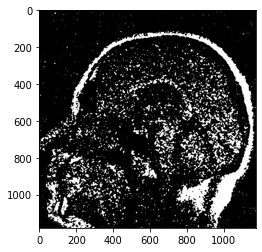

In [44]:
#url2 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjnOaoY1-_poLbinbtmsa51yvFC40OfVJOEKEvekj0svNFxX8l5vEst5dkf3veORPK3Gg&usqp=CAU"
url2 = "https://raw.githubusercontent.com/cfteach/brds/main/datasets/brain_image.png" 

imgX2 = Image.open(urlopen(url2))
imgX2 = imgX2.convert('L')

imgX2


outputfile2 = "out_brain.txt" 
img_new2 = image_to_text(imgX2,outputfile2)

outimage2 = "out_brain.png"
I,J = text_to_image(outputfile2,outimage2) 

In [48]:
beta, pi  = 0.8, 0.15 # for arbitrary parameters that reflects our prior belief
gamma = 0.5*np.log((1-pi)/pi)

T = 5000000 # sufficient number of steps to converge stationary distribution


In [49]:
img = np.loadtxt(outputfile2)
X = img 
Z = X.copy() # Initialize Z from X 

for t in range(T):
    if(t%10000==0):
      #print("...{:}".format(t))
      print('\r', 'Iteration', t, end='')
    i,j = np.random.choice(I), np.random.choice(J) # randomly choose a coordinate (i,j)
    
    # Calculate acceptance propability
    # We don't take exponential. Instead, we take the log of random number. This is more stable.
    delta_E = -2*gamma*X[i,j]*Z[i,j] -2*beta*Z[i,j]*(np.sum(Z[max(i-1,0):i+2,max(j-1,0):j+2]) - Z[i,j])
    
    # We also don't deal with minimum function for acceptance probability
    #   because we don't need to cast it to 1 if it is higher.
    
    # Flip the pixel if accepted
    if np.log(np.random.rand()) < delta_E:
        Z[i,j] = - Z[i,j] # Update the image

 Iteration 4990000

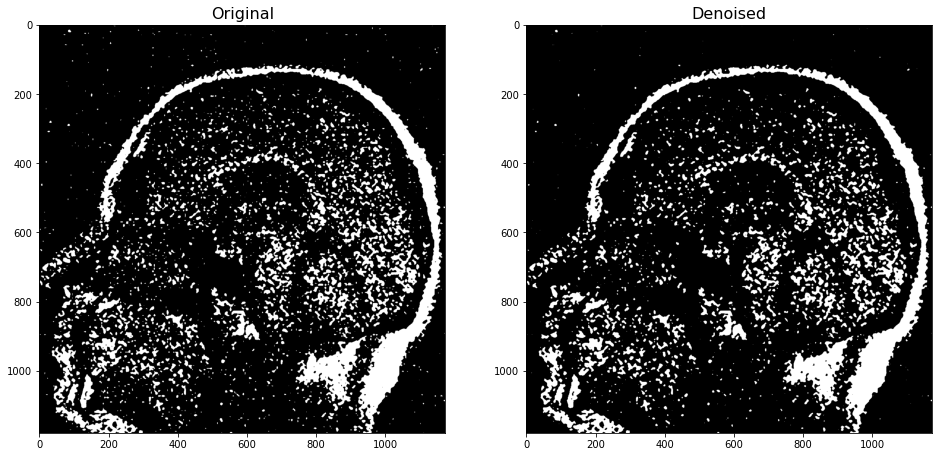

In [50]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].imshow(img,cmap='gray',vmin=-1,vmax=1)
ax[0].set_title("Original", fontsize=16)
ax[1].imshow(Z,cmap='gray',vmin=-1,vmax=1)
ax[1].set_title("Denoised", fontsize=16)
plt.show()

In [55]:
txtfile = "out_brain.txt"
outputfile = "out_brain_noisy.txt"
X_n,I_N,J_n = make_noise(txtfile,outputfile)

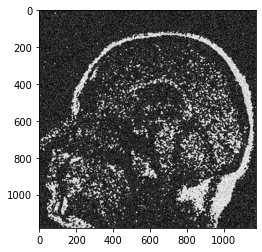

In [56]:
filepath = "out_brain_noisy.txt"
outimage = "out_brain_noisy.png"
I_n,J_n = text_to_image(filepath,outimage) 

In [57]:
beta, pi  = 0.8, 0.15 # for arbitrary parameters that reflects our prior belief
gamma = 0.5*np.log((1-pi)/pi)

T = 500000 # sufficient number of steps to converge stationary distribution


In [58]:
img = np.loadtxt(outputfile)
X = img 
Z = X.copy() # Initialize Z from X 

for t in range(T):
    if(t%10000==0):
      #print("...{:}".format(t))
      print('\r', 'Iteration', t, end='')
    i,j = np.random.choice(I_n), np.random.choice(J_n) # randomly choose a coordinate (i,j)
    
    # Calculate acceptance propability
    # We don't take exponential. Instead, we take the log of random number. This is more stable.
    delta_E = -2*gamma*X[i,j]*Z[i,j] -2*beta*Z[i,j]*(np.sum(Z[max(i-1,0):i+2,max(j-1,0):j+2]) - Z[i,j])
    
    # We also don't deal with minimum function for acceptance probability
    #   because we don't need to cast it to 1 if it is higher.
    
    # Flip the pixel if accepted
    if np.log(np.random.rand()) < delta_E:
        Z[i,j] = - Z[i,j] # Update the image

 Iteration 490000

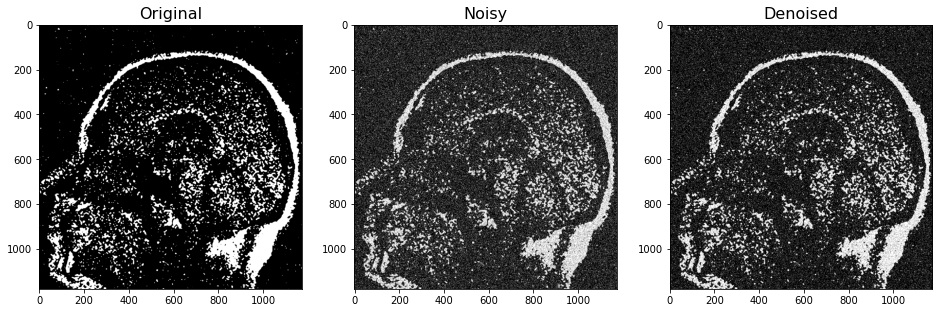

In [60]:
fig, ax = plt.subplots(1,3, figsize=(16,8))
ax[0].imshow(np.loadtxt(outputfile2),cmap='gray',vmin=-1,vmax=1)
ax[0].set_title("Original", fontsize=16)
ax[1].imshow(X,cmap='gray',vmin=-1,vmax=1)
ax[1].set_title("Noisy", fontsize=16)
ax[2].imshow(Z,cmap='gray',vmin=-1,vmax=1)
ax[2].set_title("Denoised", fontsize=16)
plt.show()